# Setting up the NN Model

### Import modules

In [ ]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import itertools
from sklearn.preprocessing import StandardScaler

### Read files

In [ ]:
(train_features, train_targets), (test_features, test_targets) = keras.datasets.mnist.load_data()

### Cutting & preparing data that we will work with (0 - 4)

We also need to standardize the data to be able to use SGD optimizer (weight updater) because of the "exploding gradients" problem where loss values are absurdly high resulting in frequent NaNs.

Reference: https://stackoverflow.com/a/37242531

In [ ]:
# Only include classses 0 - 4
indices = [train_targets[i] <= 4 for i in range(len(train_targets))] # Indices to keep will be true

train_targets = train_targets[indices]
train_features = train_features[indices]

indices = [test_targets[i] <= 4 for i in range(len(test_targets))] # Indices to keep will be true
test_targets = test_targets[indices]
test_features = test_features[indices]

In [ ]:
# One hot encode the targets
# We need to do this to use cross entropy loss function
train_targets = pd.get_dummies(train_targets)
n_samples, n_features1, n_features2 = np.shape(train_features)

# Standardizing
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features.reshape(-1,n_features1 * n_features2))
test_features = scaler.transform(test_features.reshape(-1,n_features1 * n_features2))

### Creating the model
Creating neural network with the following variable hyperparameters:
1. Learning rates
2. Batch sizes
3. Hidden Units (neurons).

In [ ]:
# Function to create the model
def initializeModel(hyperparams):

  # Train the model
  model = keras.Sequential()
  # Input layer
  model.add(keras.Input(shape=(n_features1 * n_features2,)))

  # First layer of neurons
  model.add(keras.layers.Dense(hyperparams["neurons"][0], activation='relu'))
  # Second layer of neurons
  model.add(keras.layers.Dense(hyperparams["neurons"][1], activation='relu'))

  # Output layer
  number_outputs = np.shape(train_targets)[1]
  model.add(keras.layers.Dense(number_outputs, activation='softmax'))

  # Compile (basically instantiation)
  loss=keras.losses.CategoricalCrossentropy() # Cross Entropy
  optimizerObj = keras.optimizers.SGD(learning_rate=hyperparams["learning_rate"])
  model.compile(optimizer=optimizerObj, loss=loss, metrics="accuracy")

  return model

### Training model
Going through different values of the hyperparameters and measuring their performances.

In [18]:
# Reference: https://keras.io/api/models/sequential/

hyperparameters = {
    "learning_rate": [0.001, 0.005, 0.01, 0.05, 1],
    "sizes": [128, 10000],
    "neurons" : [ [2,2], [16,32], [100, 100] ]
}

# Save history of each combination of hyperparameters
histories = pd.DataFrame(columns=list(hyperparameters.keys()) + ["history"])

# Go through every combination of hyperparameters
for combination in tqdm(list(itertools.product(*hyperparameters.values())), desc='Hyperparameter combinations'):
  # Create a dictionary with the hyperparameters
  params = {key: value for key, value in zip(hyperparameters.keys(), combination)}
  print(params)

  model = initializeModel(params)

  # Create validation
  # reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
  validation_train_feats, validation_test_feats, validation_train_targets, validation_test_targets = train_test_split(
      train_features, train_targets, test_size=0.1, random_state=42 )

  # Fit
  history = model.fit(x=train_features, y=train_targets,
            batch_size=params["sizes"], epochs=100, verbose=0,
            validation_data=(validation_train_feats, validation_train_targets))

  # Add the hyperparameters and the corresponding losses to the dataframe
  histories.loc[len(histories)] = list(params.values()) + [history.history]


Hyperparameter combinations:   0%|          | 0/30 [00:00<?, ?it/s]

{'learning_rate': 0.001, 'sizes': 128, 'neurons': [2, 2]}
{'learning_rate': 0.001, 'sizes': 128, 'neurons': [16, 32]}
{'learning_rate': 0.001, 'sizes': 128, 'neurons': [100, 100]}
{'learning_rate': 0.001, 'sizes': 10000, 'neurons': [2, 2]}
{'learning_rate': 0.001, 'sizes': 10000, 'neurons': [16, 32]}
{'learning_rate': 0.001, 'sizes': 10000, 'neurons': [100, 100]}
{'learning_rate': 0.005, 'sizes': 128, 'neurons': [2, 2]}
{'learning_rate': 0.005, 'sizes': 128, 'neurons': [16, 32]}
{'learning_rate': 0.005, 'sizes': 128, 'neurons': [100, 100]}
{'learning_rate': 0.005, 'sizes': 10000, 'neurons': [2, 2]}
{'learning_rate': 0.005, 'sizes': 10000, 'neurons': [16, 32]}
{'learning_rate': 0.005, 'sizes': 10000, 'neurons': [100, 100]}
{'learning_rate': 0.01, 'sizes': 128, 'neurons': [2, 2]}
{'learning_rate': 0.01, 'sizes': 128, 'neurons': [16, 32]}
{'learning_rate': 0.01, 'sizes': 128, 'neurons': [100, 100]}
{'learning_rate': 0.01, 'sizes': 10000, 'neurons': [2, 2]}
{'learning_rate': 0.01, 'sizes':

In [25]:
histories

,learning_rate,sizes,neurons,history,last_val_loss
0,0.001,128,"[2, 2]","{'loss': [1.617204189300537, 1.613869667053222...",1.110239
1,0.001,128,"[16, 32]","{'loss': [1.591202735900879, 1.269467473030090...",0.084645
2,0.001,128,"[100, 100]","{'loss': [1.502294898033142, 0.969775021076202...",0.063334
3,0.001,10000,"[2, 2]","{'loss': [1.863505482673645, 1.846326589584350...",1.413063
4,0.001,10000,"[16, 32]","{'loss': [1.7093591690063477, 1.70095777511596...",1.118215
5,0.001,10000,"[100, 100]","{'loss': [1.8271074295043945, 1.79878628253936...",0.787493
6,0.005,128,"[2, 2]","{'loss': [1.4243507385253906, 1.29030597209930...",0.612494
7,0.005,128,"[16, 32]","{'loss': [1.0421291589736938, 0.37438011169433...",0.029143
8,0.005,128,"[100, 100]","{'loss': [0.7834516763687134, 0.26506358385086...",0.012761
9,0.005,10000,"[2, 2]","{'loss': [1.6139293909072876, 1.61150395870208...",1.268774


### Extract best set of hyperparameters

In [39]:
# Select the last value of the validation loss values in the history object.

# Get the last loss value from the list of VAL_LOSSES (last value because that's the final fully-updated model with improved weights, we check val_losses because that's the performance of the model on unseen data)
# Get that loss value's corresponding hyperparameters.
# Use predictions = model.fit with the chosen hyperparams and use it for the confusion matrix

histories["last_val_loss"] = histories["history"].apply(lambda x: x["val_loss"][-1])
histories["last_val_acc"] = histories["history"].apply(lambda x: x["val_accuracy"][-1])
histories["last_loss"] = histories["history"].apply(lambda x: x["loss"][-1])
histories["last_acc"] = histories["history"].apply(lambda x: x["accuracy"][-1])
sorted_histories = histories.sort_values(by="last_val_loss", ascending=True)
best_hyperparams = sorted_histories.iloc[0]

print(best_hyperparams)

learning_rate                                                 0.05
sizes                                                          128
neurons                                                 [100, 100]
history          {'loss': [0.22832541167736053, 0.0838898494839...
last_val_loss                                             0.000268
last_val_acc                                                   1.0
last_loss                                                 0.000272
last_acc                                                       1.0
Name: 20, dtype: object


Report of best model errors (here, metric = accuracy):
1. Validation accuracy = ~100%
2. Training accuracy = ~100%
3. Testing accuracy below.

# Discuss Errors & Convergence


In [22]:
import matplotlib.pyplot as plt

### Loss (convergence)
Graphs below show convergence of loss to its minimum value as we train the model on different hyperparameters.

Graphs of large learning rates have huge losses so their y-axis scale is the **magnitude** of the **highest loss** in the power of 10.

We can see the graphs of the losses and errors of the different hyperparameters (learning rates, batch sizes, number of neurons in a layer).

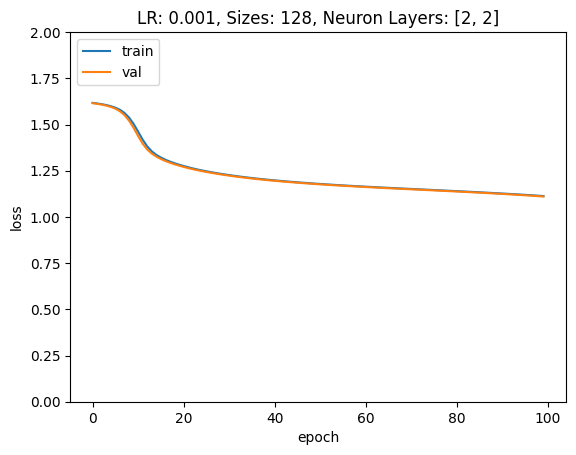

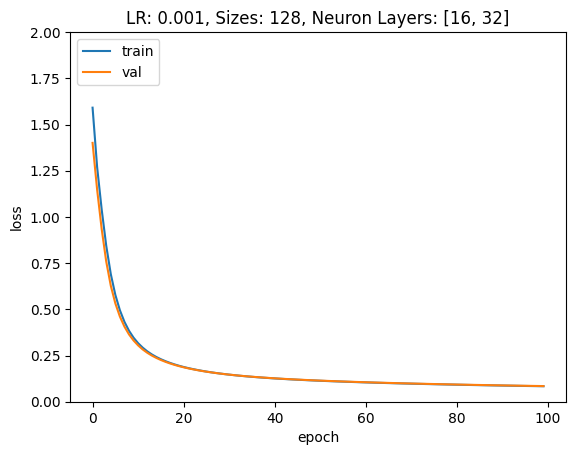

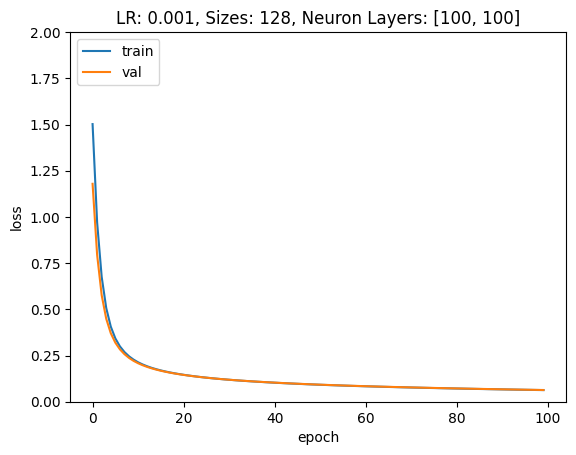

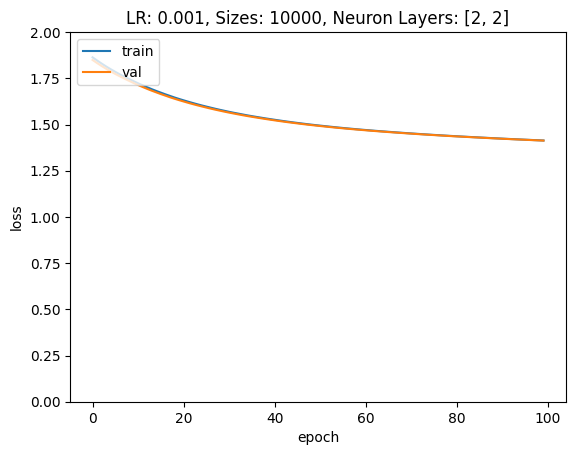

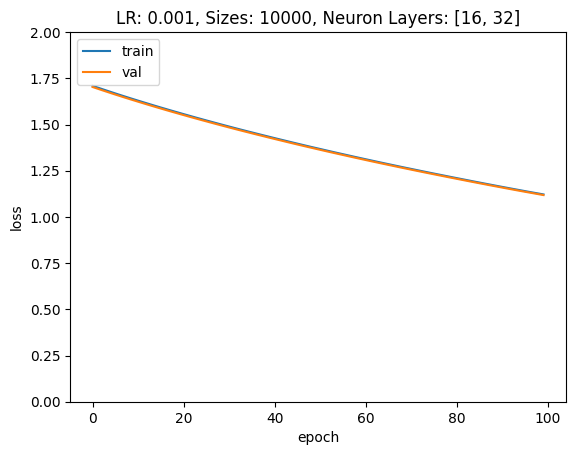

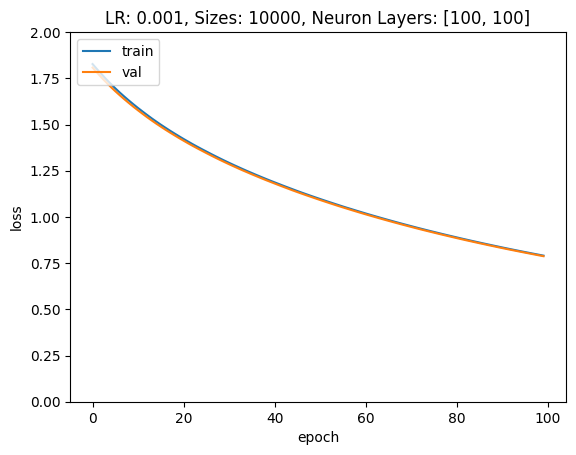

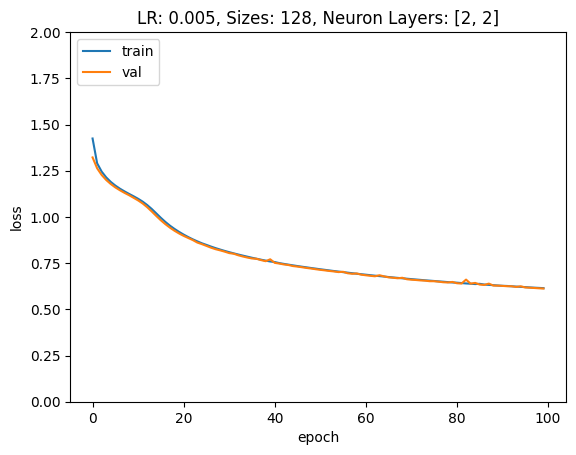

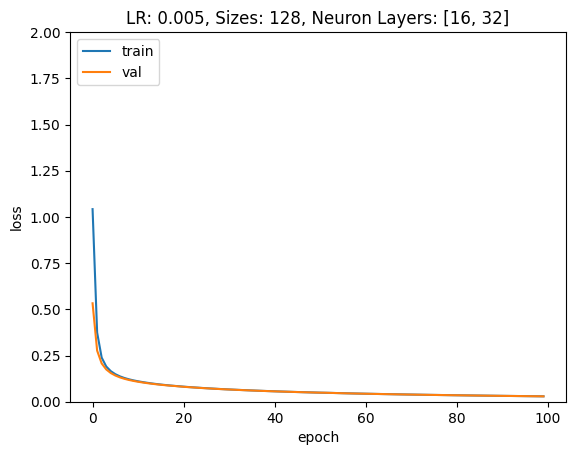

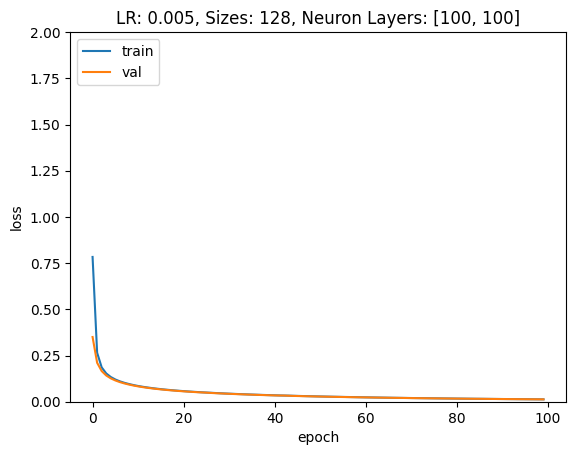

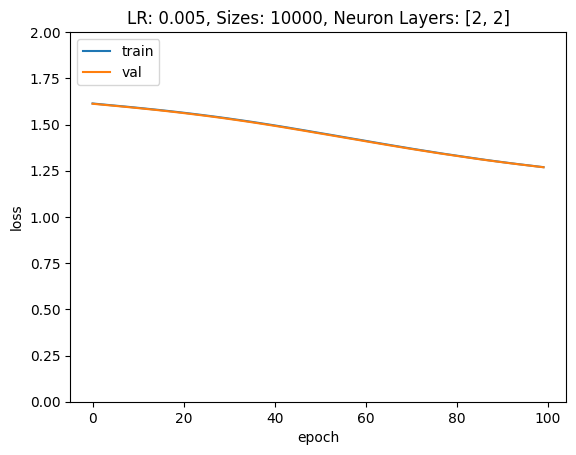

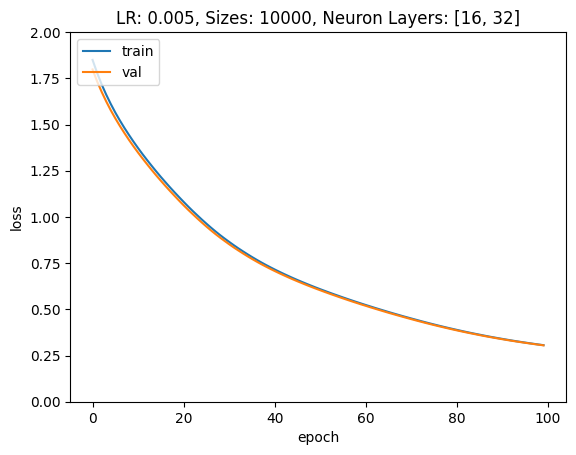

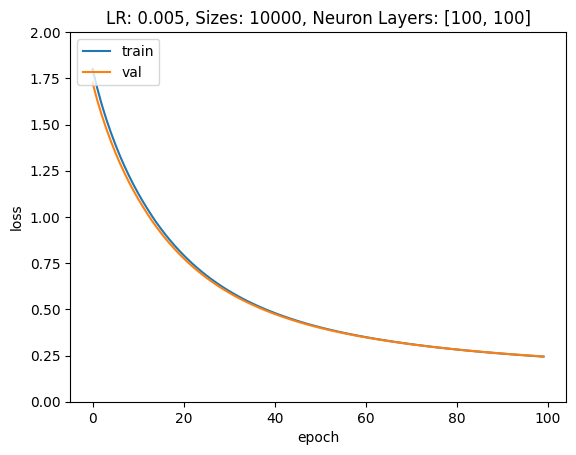

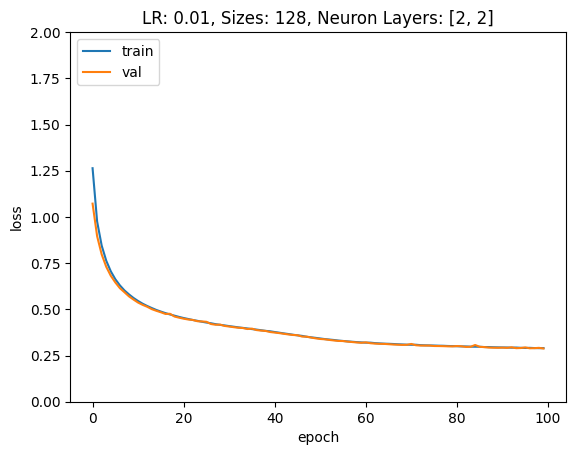

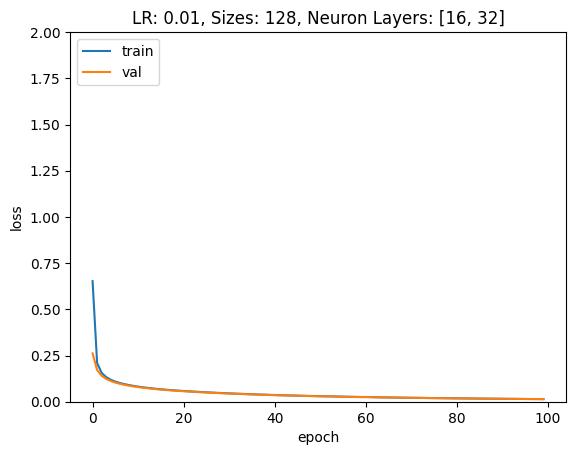

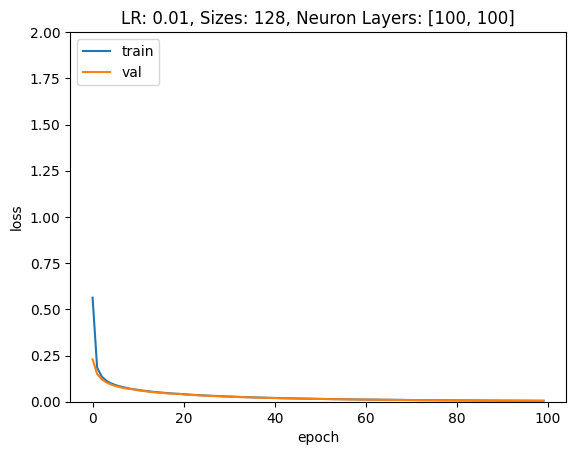

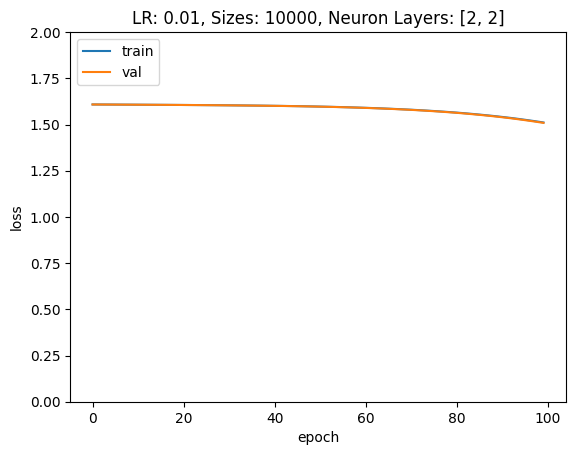

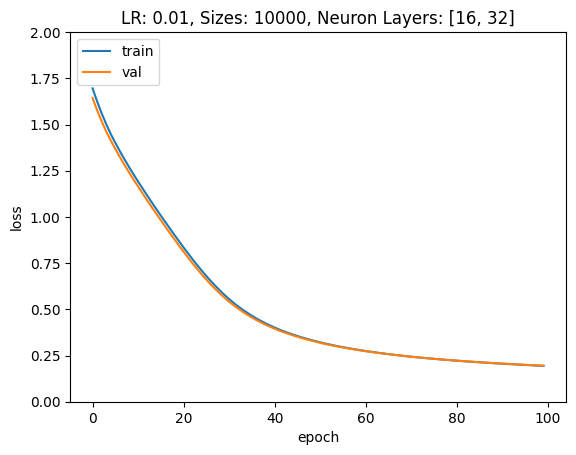

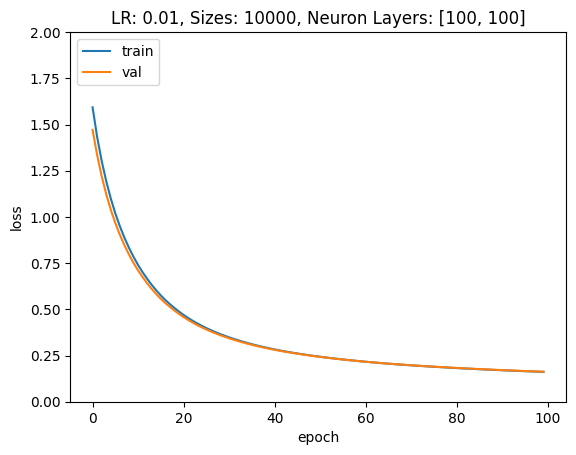

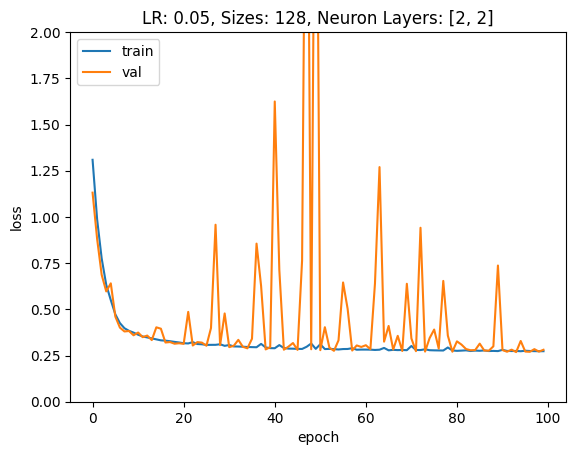

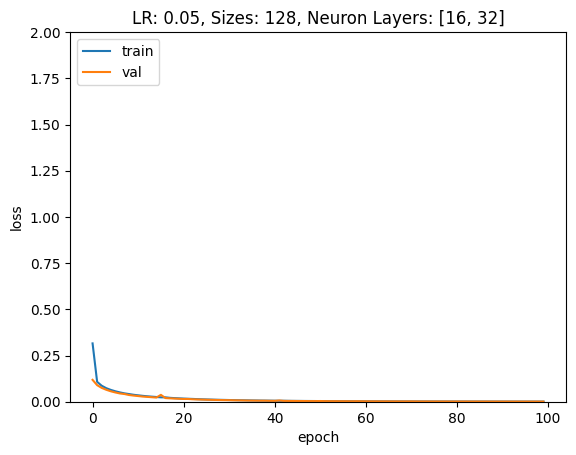

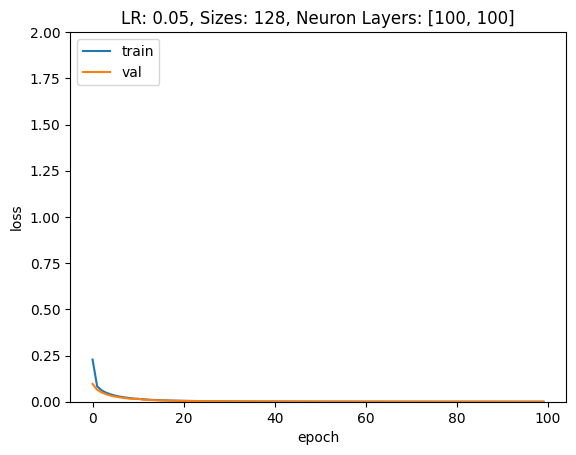

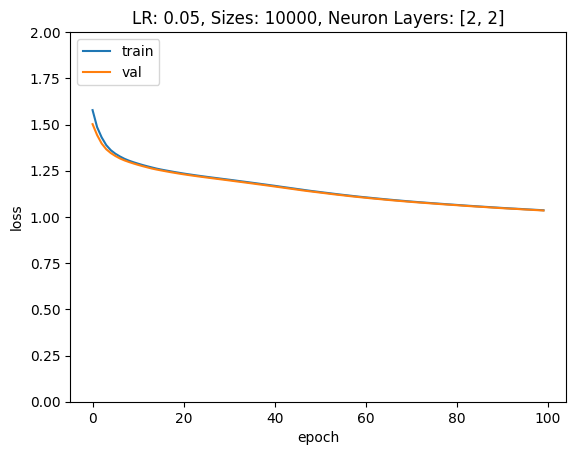

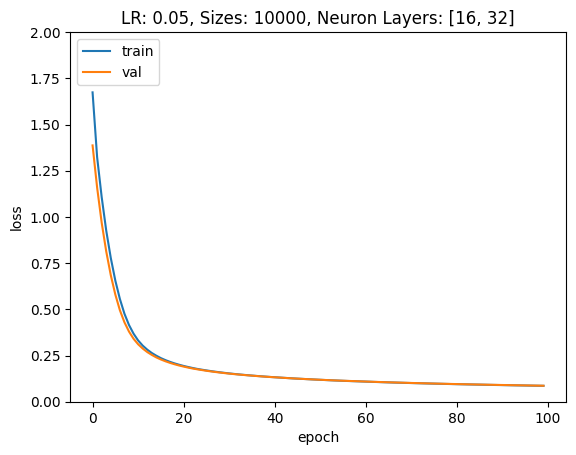

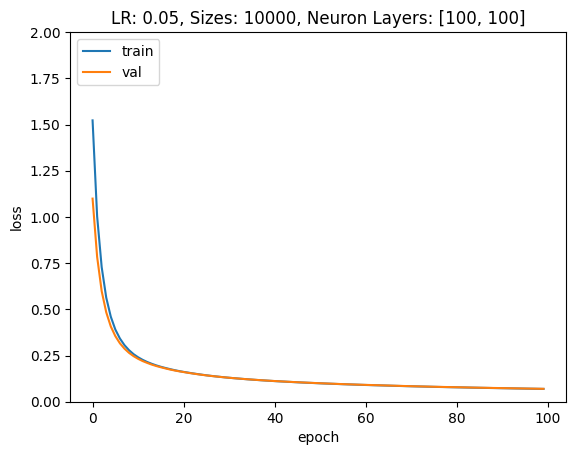

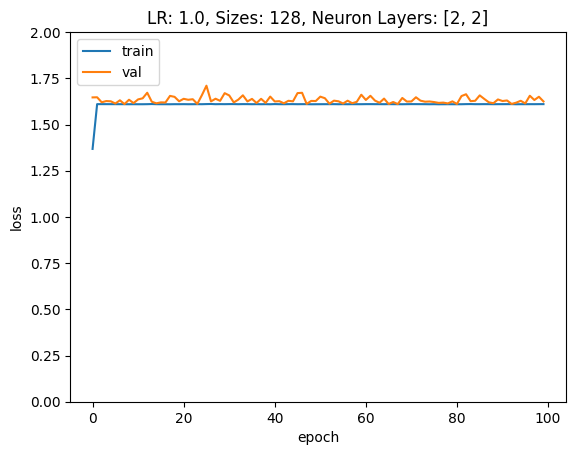

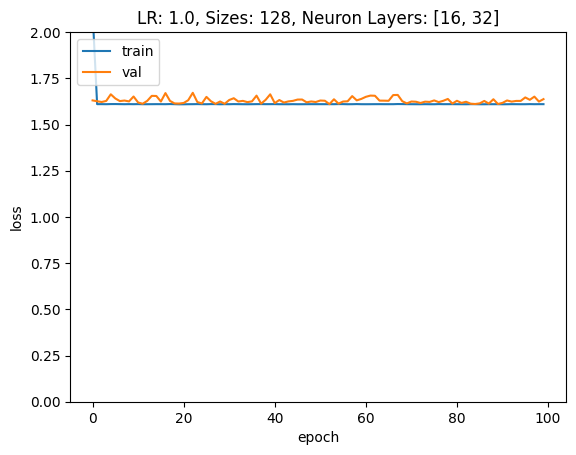

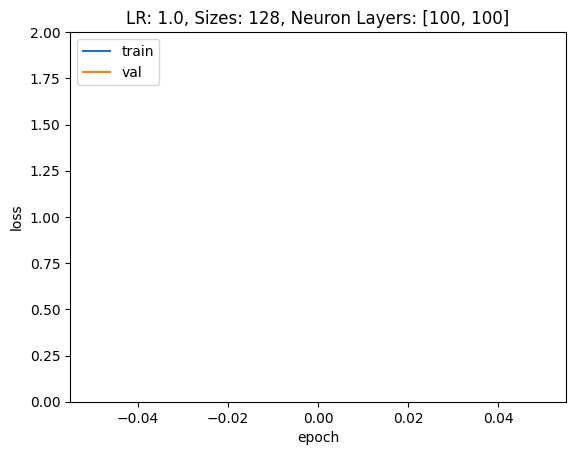

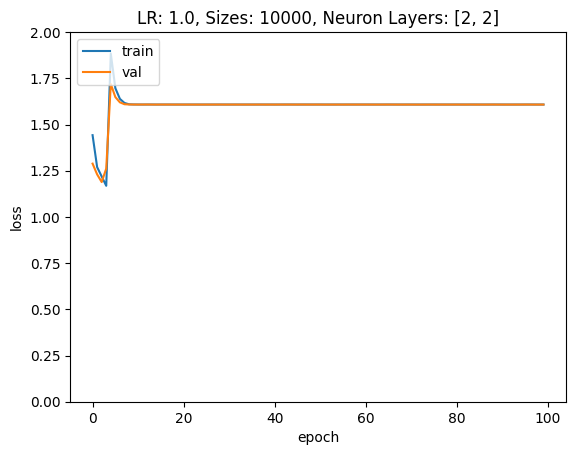

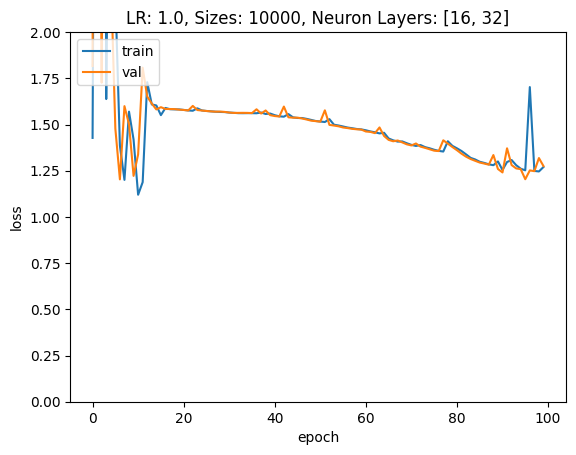

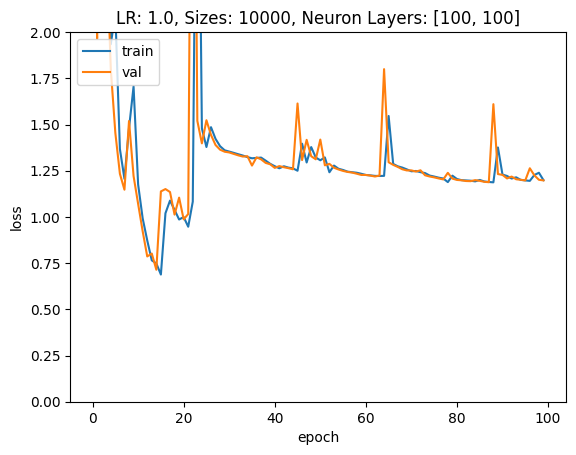

In [29]:
# reference: https://stackoverflow.com/a/56807595

# Graph loss for each combination of hyperparameters
for (index, series) in histories.iterrows():
  plt.plot(
      series["history"]["loss"])
  plt.plot(series["history"]['val_loss'])
  plt.title(f'LR: {series["learning_rate"]}, Sizes: {series["sizes"]}, Neuron Layers: {series["neurons"]}')
  plt.ylim(0,2)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

### Training and validation data errors (accuracy)

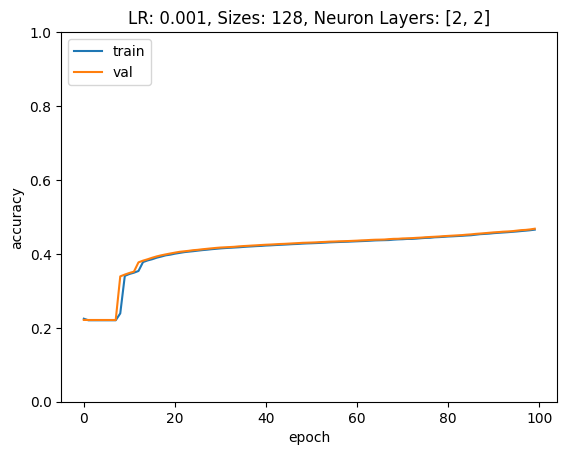

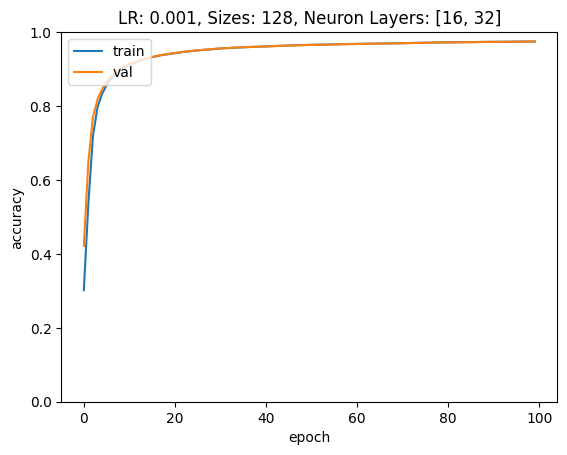

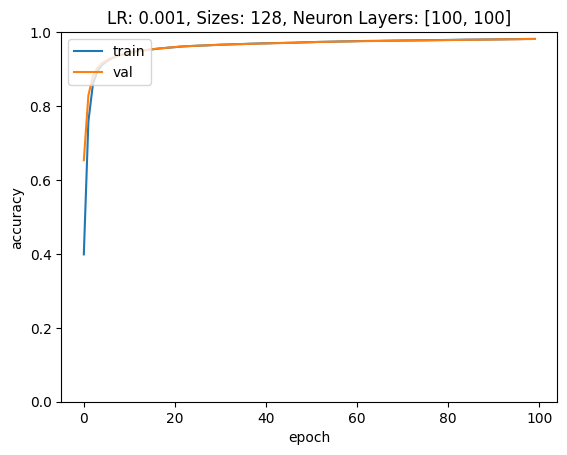

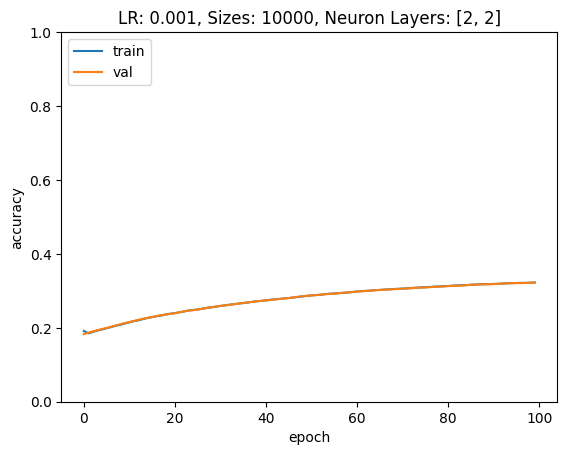

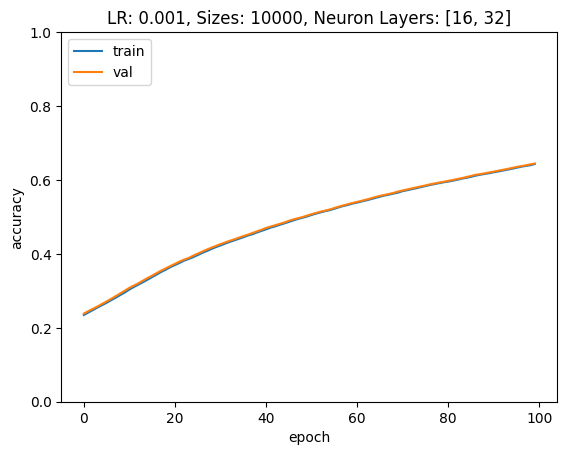

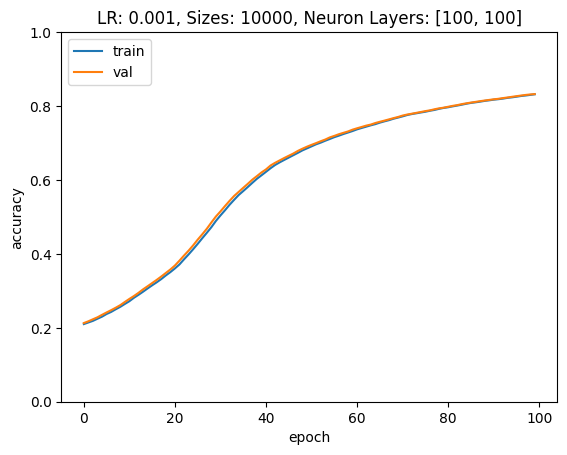

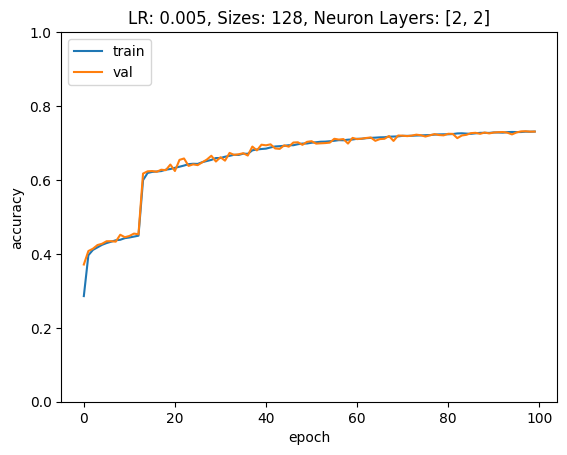

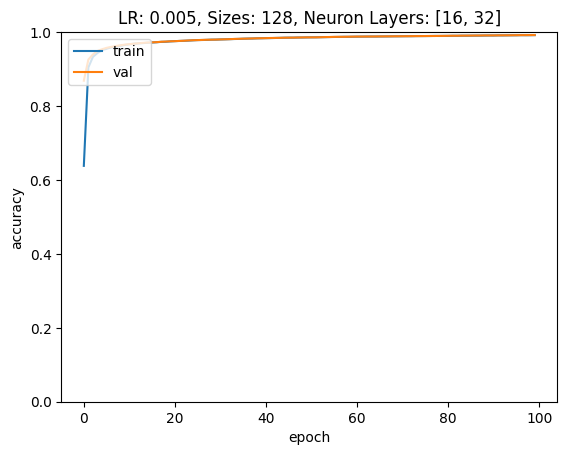

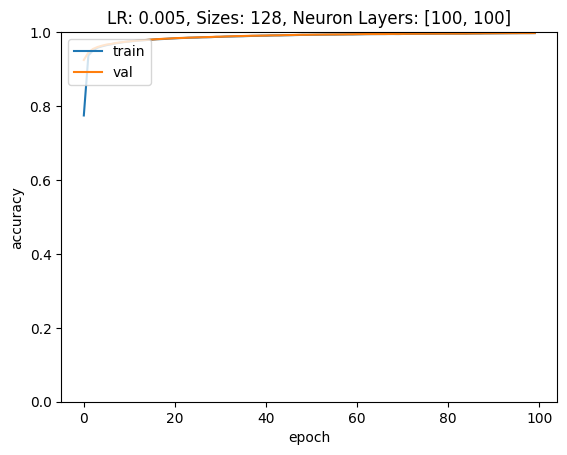

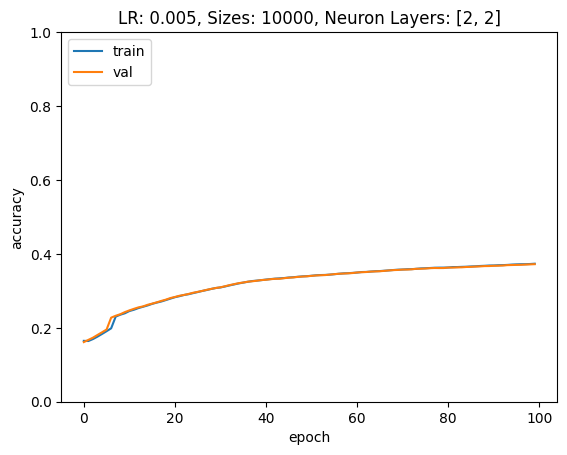

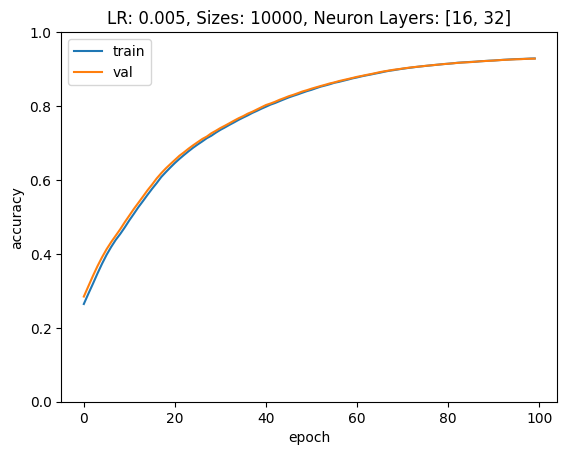

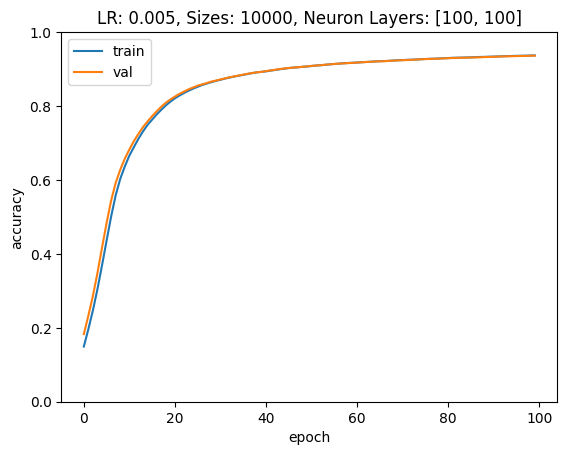

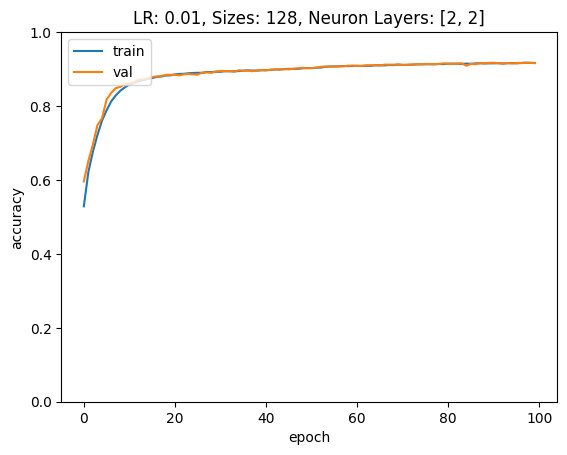

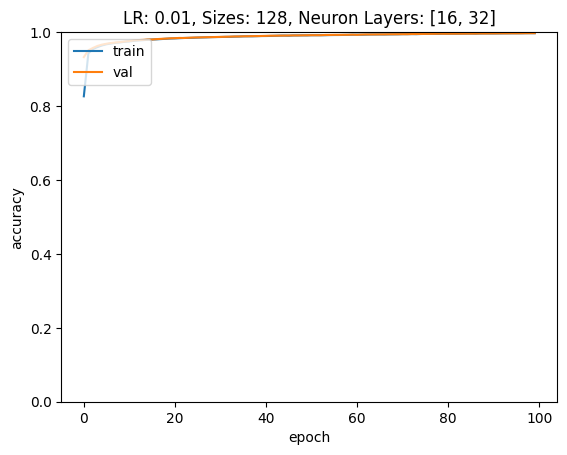

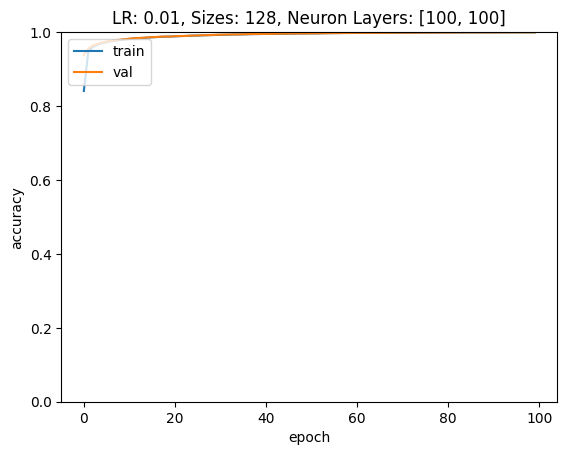

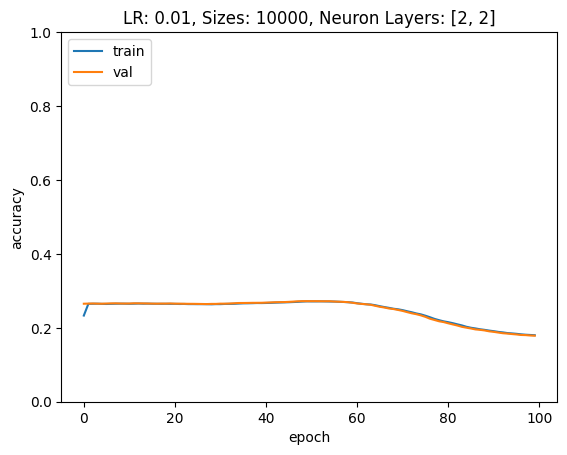

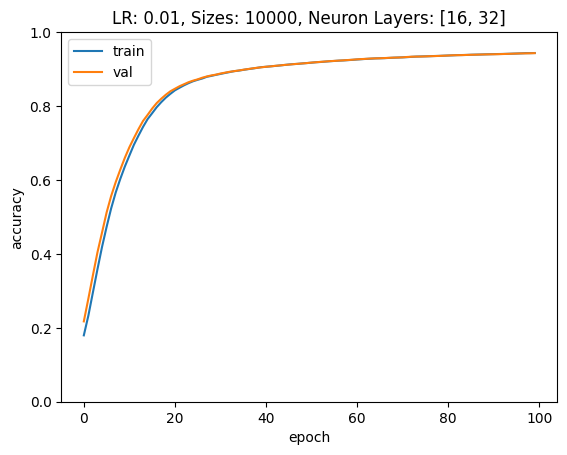

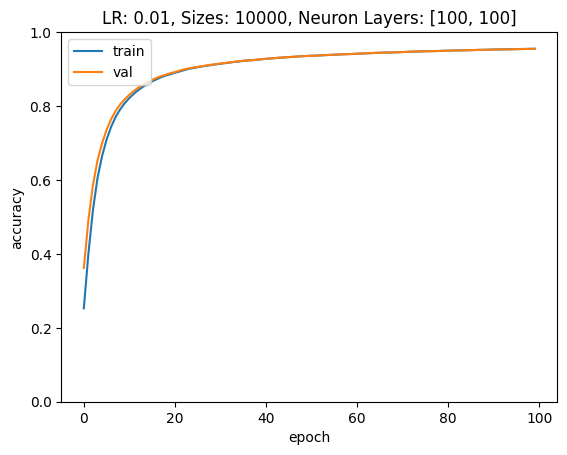

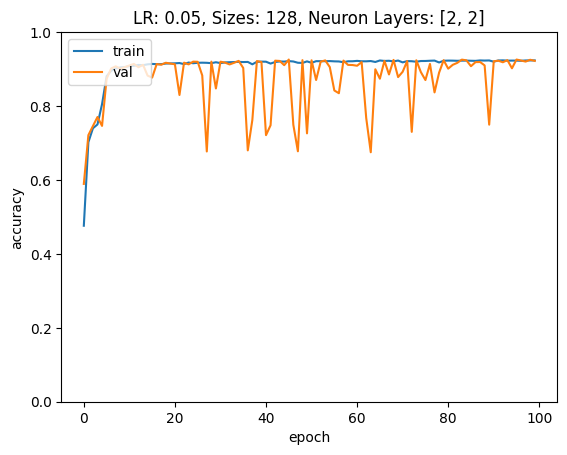

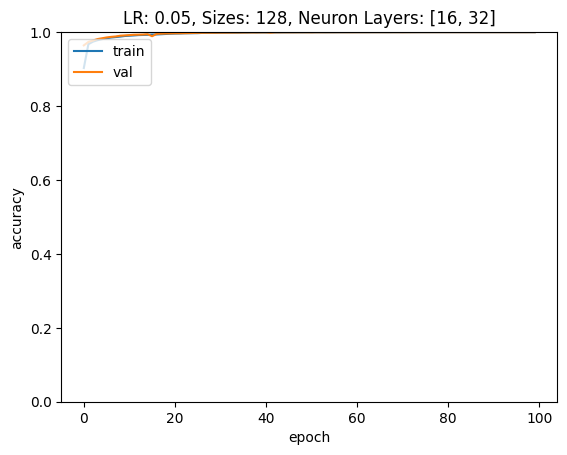

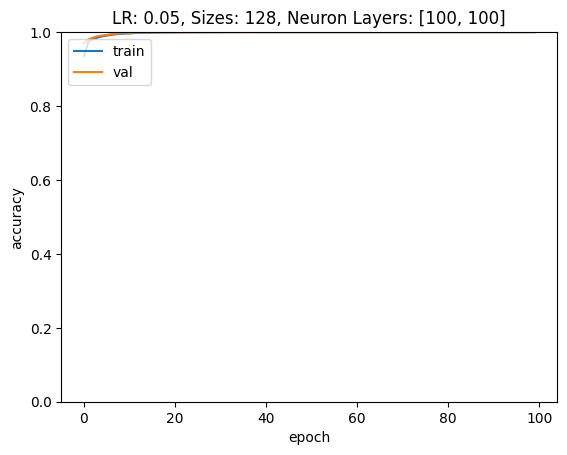

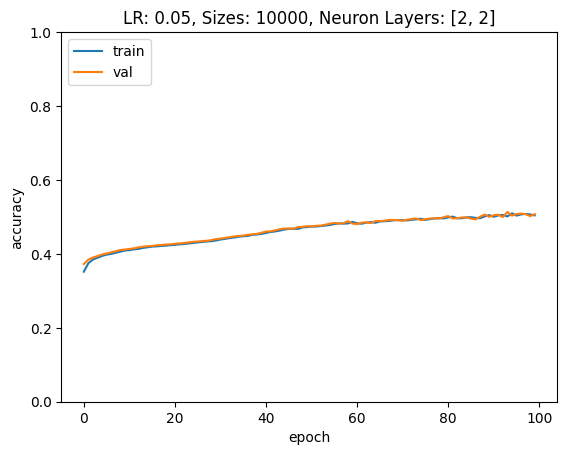

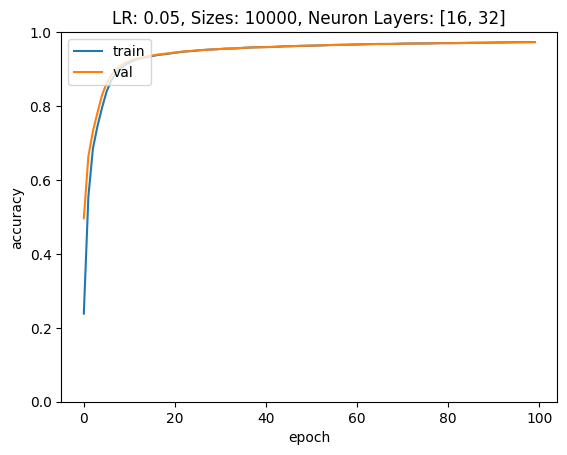

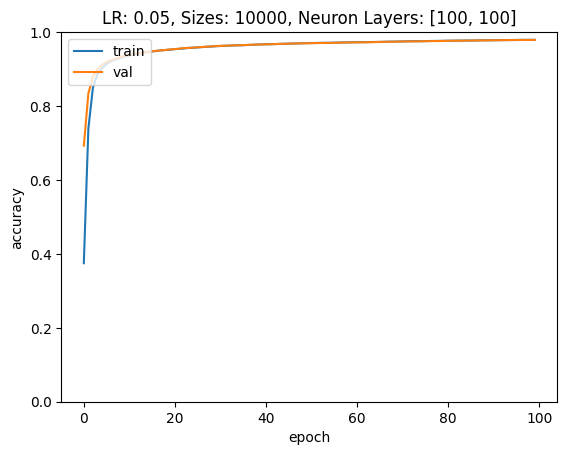

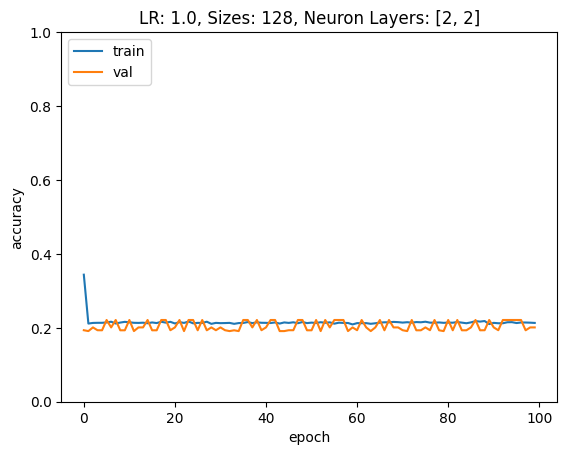

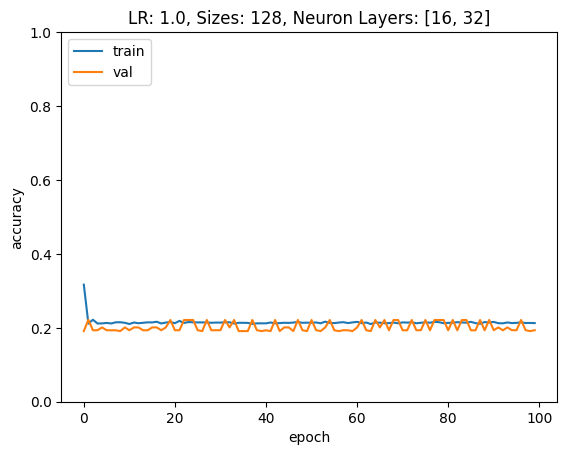

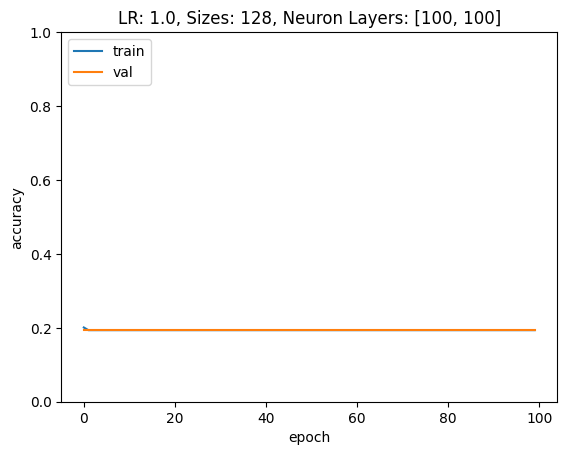

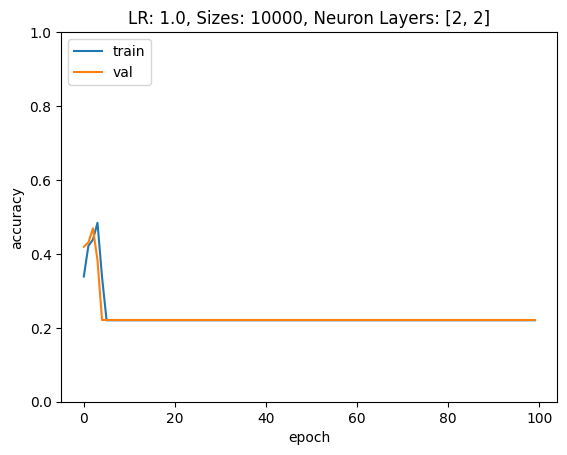

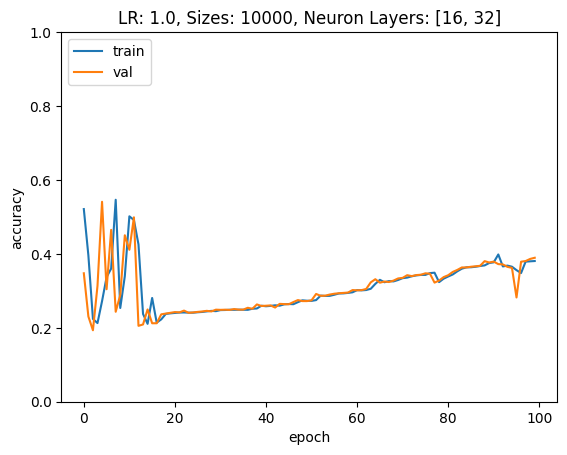

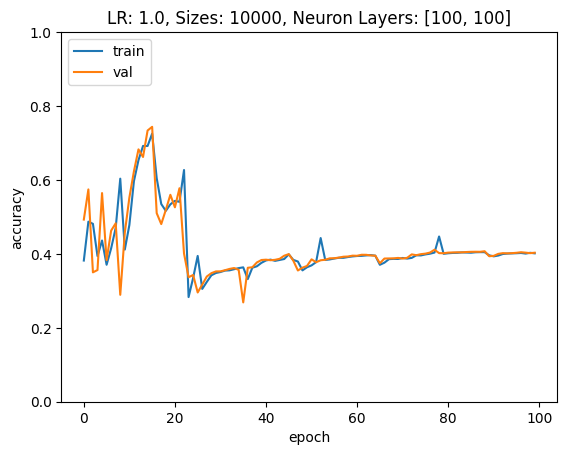

In [30]:
# Graph accuracy for each combination of hyperparameters
for (index, series) in histories.iterrows():
  plt.plot(
      series["history"]["accuracy"])
  plt.plot(series["history"]['val_accuracy'])
  plt.title(f'LR: {series["learning_rate"]}, Sizes: {series["sizes"]}, Neuron Layers: {series["neurons"]}')
  plt.ylim(0,1)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

The MNIST dataset has a lot of data points so the losses with even bad hyperparameters results in low loss and somewhat high accuracies.

#### c. THE **EFFECT OF NEURONS** IN THE NEURAL NETWORK

But on careful observation of the graphs and with repeated training of the models, the modification of neurons (hidden units) in the different layers of the model leads to overfitting with a large number of neurons and underfitting with a small number of neurons (i.e. the model doesn't learn anything in this case) in the different layers.

#### b. THE **EFFECT OF LEARNING RATES AND BATCH SIZES** IN THE NEURAL NETWORK

Extreme values of learning rates have a very obvious effect on model performances. Large learning rates means that the model is never really able to converge to the lowest loss and small learning rates means that the model takes too long (it might not even reach it) to converge.

Low batch seems to result in somewhat increased model performance but it isn't so clear. Low batch size has frequent updates to its weight vector and leads to a more "unstable" and erratic convergence process and it may be accounting for noise. The performance measures of high batch sizes are slightly lower.

# Confusion Matrix

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

### Retraining the model on the best hyperparameters & predicting on full testing data

In [ ]:
# Choose the best performance hyperparameters and train it again
# We saved best_hyperparams in previous chunk
model = initializeModel(best_hyperparams)

# Fit
history = model.fit(x=train_features, y=train_targets,
          batch_size=best_hyperparams["sizes"], epochs=100, verbose=2)

# Test
predictions = model.predict(x=test_features)

### Reporting confusion matrix of best performance model

0.9902704806382565


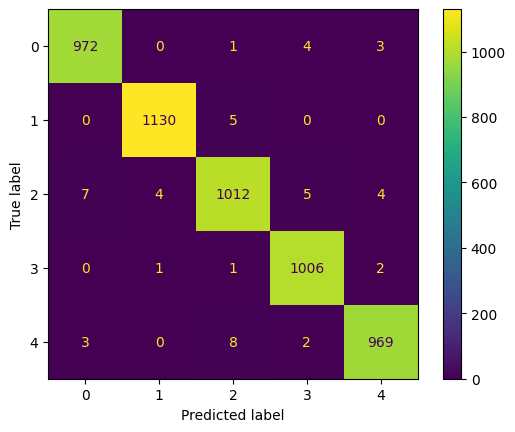

In [40]:
length = len(test_targets)
ConfusionMatrixDisplay.from_predictions(
    test_targets, [ np.argmax(predictions[i]) for i in range(length)] )

# Accuracy of the model on testing data
print( sum( [ np.argmax(predictions[i]) == test_targets[i] for i in range(length)] ) / length )

Testing accuracy of best model (error metric): ~99%